In [1]:
%matplotlib notebook
import pandas as pd
datos_caudales = pd.read_excel('datos.xlsx', index_col=0, parse_dates=True)

In [2]:
datos_caudales.head()

,Q ( m3/s)
Fecha,
2023-09-12,46.2036
2023-09-13,46.1825
2023-09-14,46.2085
2023-09-15,46.7825
2023-09-16,45.8507


In [3]:
datos_caudales.tail()

,Q ( m3/s)
Fecha,
2023-11-26,46.1025
2023-11-27,46.2102
2023-11-28,46.5784
2023-11-29,46.2152
2023-11-30,46.3406


<IPython.core.display.Javascript object>


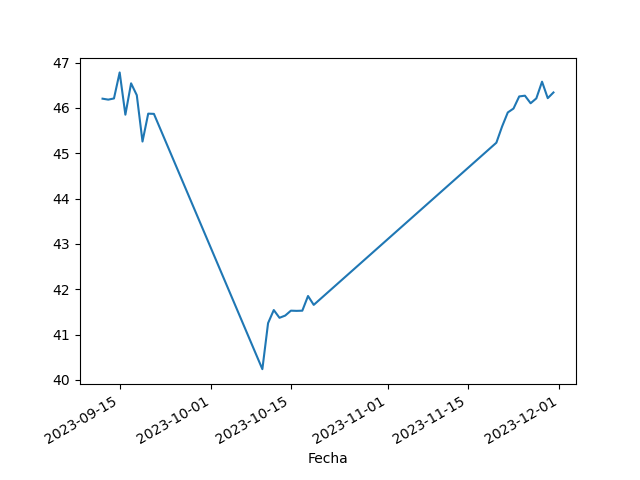

In [4]:
datos_caudales['Q   ( m3/s)'].plot()
figsize=(16,3)

In [5]:
solo_caudal = datos_caudales[['Q   ( m3/s)']]
solo_caudal.head()

,Q ( m3/s)
Fecha,
2023-09-12,46.2036
2023-09-13,46.1825
2023-09-14,46.2085
2023-09-15,46.7825
2023-09-16,45.8507


<IPython.core.display.Javascript object>


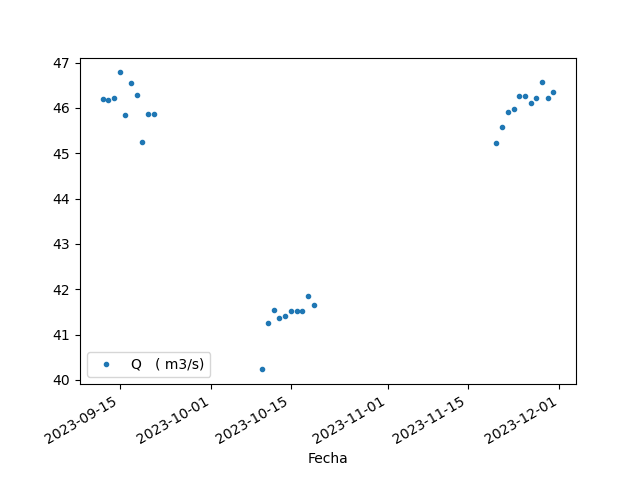

In [6]:
solo_caudal.plot(style=".")
figsize=(16,3)

In [7]:
caudales_mensuales = solo_caudal.groupby(lambda m: m.month)
caudales_mensuales.head()

,Q ( m3/s)
Fecha,
2023-09-12,46.2036
2023-09-13,46.1825
2023-09-14,46.2085
2023-09-15,46.7825
2023-09-16,45.8507
2023-10-10,40.2365
2023-10-11,41.2521
2023-10-12,41.5407
2023-10-13,41.3696


<IPython.core.display.Javascript object>


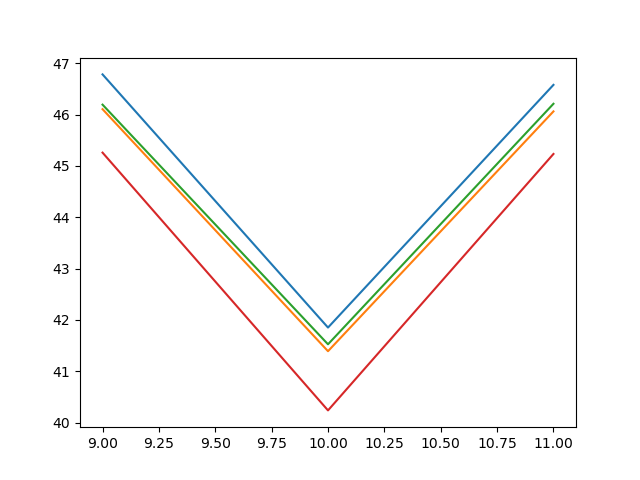

In [8]:
import matplotlib.pyplot as plt
plt.plot(caudales_mensuales.max())
plt.plot(caudales_mensuales.mean())
plt.plot(caudales_mensuales.median())
plt.plot(caudales_mensuales.min())
plt.show()

<IPython.core.display.Javascript object>


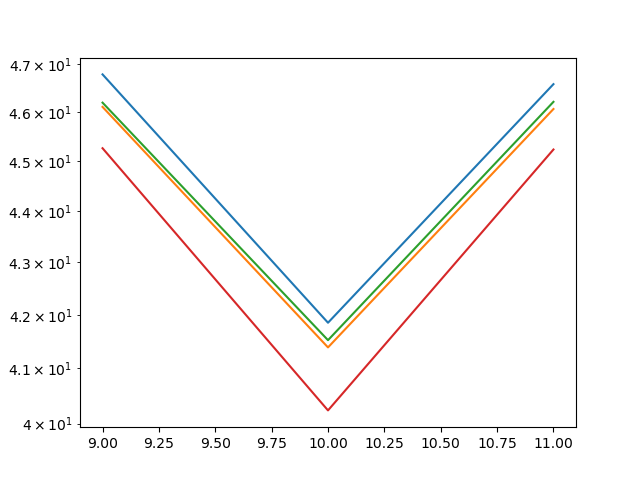

In [9]:
import matplotlib.pyplot as plt
plt.plot(caudales_mensuales.max())
plt.plot(caudales_mensuales.mean())
plt.plot(caudales_mensuales.median())
plt.plot(caudales_mensuales.min())
plt.semilogy()
plt.show()

<IPython.core.display.Javascript object>


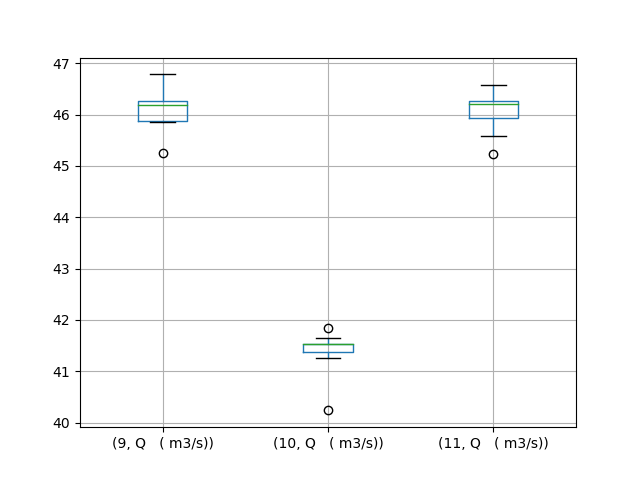

{'whiskers': [<matplotlib.lines.Line2D at 0x20879318350>,
 'caps': [<matplotlib.lines.Line2D at 0x2087931af10>,
 'boxes': [<matplotlib.lines.Line2D at 0x208797a67d0>,
 'medians': [<matplotlib.lines.Line2D at 0x2087933c090>,
 'fliers': [<matplotlib.lines.Line2D at 0x2087931ad10>,
 'means': []}

In [11]:
caudales_mensuales.boxplot(subplots=False, return_type="dict")

In [17]:
caudales_mensuales.quantile(.05)

,Q ( m3/s)
Fecha,
9,45.524935
10,40.693520
11,45.411050


<IPython.core.display.Javascript object>


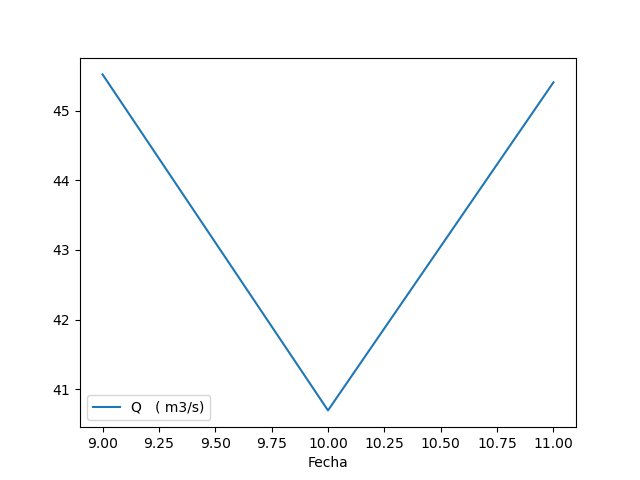

<Axes: xlabel='Fecha'>

In [18]:
caudales_mensuales.quantile(.05).plot()

In [27]:
caudales_mensuales.quantile(0.3)

,Q ( m3/s)
Fecha,
9,45.87176
10,41.40383
11,45.98580


In [25]:
caudales_mensuales.quantile(0.5)

,Q ( m3/s)
Fecha,
9,46.19305
10,41.52450
11,46.21020
